In [480]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import glob
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import numpy as np
from matplotlib import cm
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import array_to_img
from scipy.stats import norm
import pandas as pd
from tensorflow.keras import datasets, layers, models


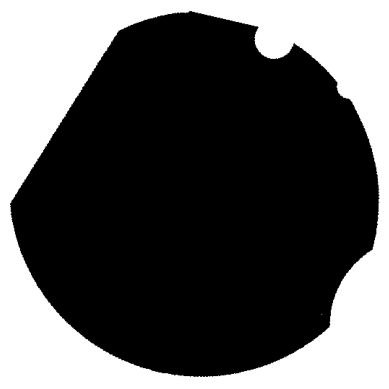

In [481]:

# load the mask image
maskim = Image.open('./mask.png')
maskdata = np.array(maskim, dtype='i2')

plt.figure()
plt.axis('off')
plt.imshow(maskim, cmap='gray_r')


4698


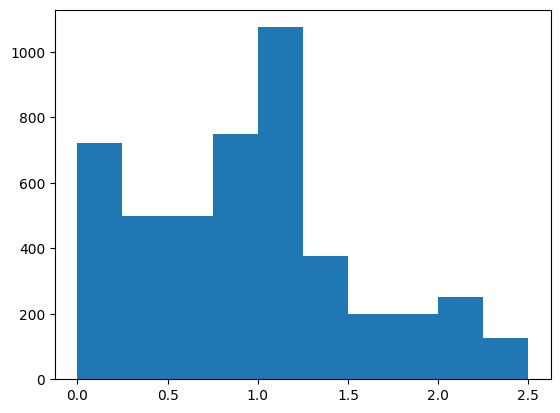

In [482]:
directory = "../kernels/"
df = pd.read_csv(directory + "attenuations.csv")
KW = 12
KH = 12
batch_size=64#len(df)
df_size = len(df)
image_size = (KW,KH)

i = 0
images = []
attenuations = []
for index, row in df.iterrows():
    filename = directory + row[2]
    attenuation = row[1]
    if(attenuation < 0):
        attenuation = 0
    if(attenuation > 2.5):
        attenuation = 2.5
    if(attenuation < 0.2):
        i += 1
    #if(i % 20 == 1 or attenuation > 0.2):
    attenuations.append(attenuation)
    img = load_img(filename, target_size=image_size)
    img_array = img_to_array(img)
    images.append(img_array)
    
DF = pd.DataFrame(pd.Series(images))
DF.columns = ["image"]
DF["attenuation"] = attenuations

plt.hist(DF["attenuation"])
plt.savefig('attenuation_distibution.png')
print(len(images))


dataset = tf.data.Dataset.from_tensor_slices((list(DF['image'].values), DF['attenuation'].values))

test_split = int(df_size * 0.2)
#dataset.shuffle(batch_size)
test_dataset = dataset.take(test_split)
train_dataset = dataset.skip(test_split).take(df_size-test_split)
test_dataset = test_dataset.batch(test_split).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(df_size - test_split).cache().prefetch(buffer_size=tf.data.AUTOTUNE)



In [483]:
model = models.Sequential()
model.add(layers.Conv2D(12, (3, 3), activation='relu', strides=2, padding="same", input_shape=(12, 12, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(units=1))

In [484]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 6, 6, 12)          336       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 3, 3, 12)          0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 2, 2, 64)          6976      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_31 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 128)             

In [485]:
epochs = 100

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss='mean_squared_error'
)


In [486]:
history = model.fit(
    train_dataset,
    epochs=epochs,
)


Epoch 1/100
1/1 [==============================] - 0s 468ms/step - loss: 2.7942
Epoch 2/100
1/1 [==============================] - 0s 77ms/step - loss: 1.1132
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 0.8125
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 1.1180
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 1.2114
Epoch 6/100
1/1 [==============================] - 0s 79ms/step - loss: 1.0015
Epoch 7/100
1/1 [==============================] - 0s 83ms/step - loss: 0.7349
Epoch 8/100
1/1 [==============================] - 0s 79ms/step - loss: 0.6352
Epoch 9/100
1/1 [==============================] - 0s 76ms/step - loss: 0.7395
Epoch 10/100
1/1 [==============================] - 0s 84ms/step - loss: 0.8534
Epoch 11/100
1/1 [==============================] - 0s 78ms/step - loss: 0.8315
Epoch 12/100
1/1 [==============================] - 0s 86ms/step - loss: 0.7095
Epoch 13/100
1/1 [==============================

In [487]:
#save model
model.save('./model/')

INFO:tensorflow:Assets written to: ./model/assets


In [488]:
#load a previous model:
model = tf.keras.models.load_model('./model/')

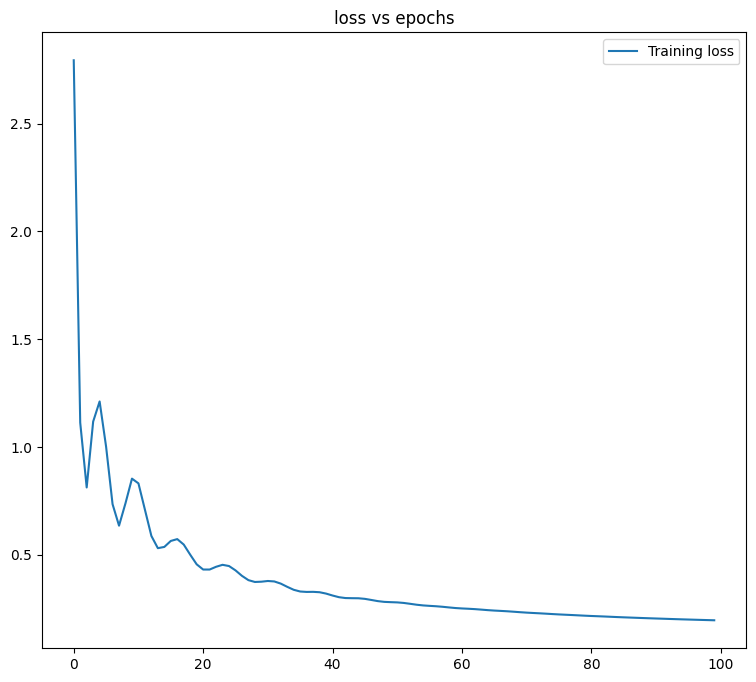

In [489]:
#model performance visualization
f = plt.figure(figsize=(20,8))

#loss
plt2 = f.add_subplot(122)
plt2.plot(history.history['loss'], label = str('Training loss'))
plt.legend()
plt.title('loss vs epochs')

plt.show()

In [490]:
model.evaluate(test_dataset)

1/1 [==============================] - 0s 132ms/step - loss: 1.4239


1.4239325523376465

In [491]:
cmap = plt.colormaps['jet'].copy()
cmap.set_bad('white')      # color of mask on heatmap
cmap.set_under('white')    # color of mask on cbar


In [492]:
IW = 512
IH = 512

size = KW / 2 #side length of kernel from center. 16x16 for size=8
maxSqrSize = 145 #length from center to edge
midx = IW/2
midy = IH/2


2.789659023284912


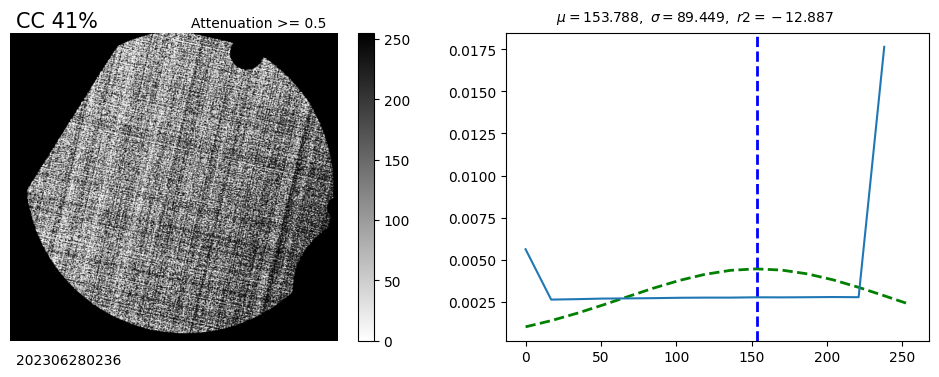

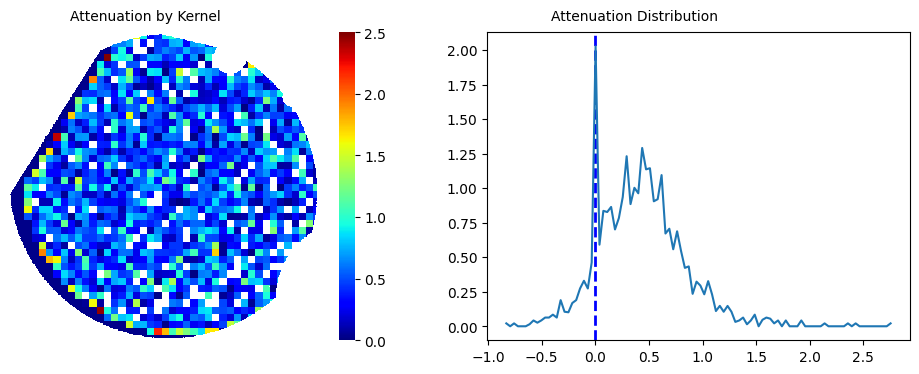

202306280236 41


KeyboardInterrupt: 

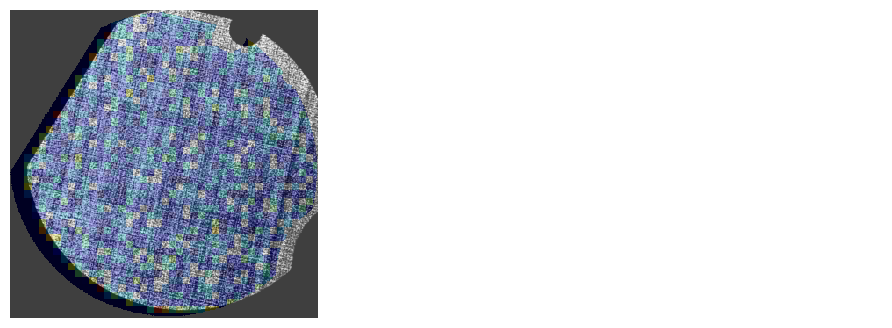

In [493]:
#load image

# make sure to check images from the mix,clear, and cloudy folders
folder="../images/"
i = 0
for file in glob.glob(folder + '/*.png'):

# how many tests do you want to look at
#for i in range(1):

#    while True:
#        a=random.choice(os.listdir(folder))
#        if "20200616_2253" in a:
#        if "20200619_2023" in a:
#        if "20230726_2242" in a:
#        if "20230718_0331" in a:
#        if "20230322_2048" in a:
#        if "20220927_0324" in a:
#        if "20220625_2352" in a:
#        if "20220501_0044" in a:
#        if "20220420_2102" in a:
#            break
#    a=random.choice(os.listdir(folder))
#    print (a)
    
#    file = folder+'/'+a
#    print(file)

#im = Image.open("./train/cloudy/202302042354a.png")

    filedate = file.split('/')[2].split('asiva')[1].split('.')[-2]

#    print (filedate, filetime)
    im = Image.open(file)

    imc = im
    x_locs = np.arange(size, IW, size * 2)
    y_locs = np.arange(size, IH, size * 2)

    heatmap = np.empty([IH, IW])

    heatmap_masked = []
    
    for y in y_locs:
        for x in x_locs:
            imk = imc.crop((x-size, y-size, x+size, y+size))
            imk.save("tmp.png")
            img = load_img("tmp.png", target_size=image_size)
            img_array = img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis
        
            predictions = model.predict(img_array, verbose = 0)
            cloudy_score = predictions[0]

            size = int(size)
            y = int(y)
            x = int(x)
            
            for k_y in range(y-size, y+size):
                for k_x in range(x-size, x+size):
                    if (k_y >= IH):
                        continue
                    if (k_x >= IW):
                        continue
                    if (cloudy_score <= 0):
                        heatmap[k_y, k_x] = 0
                    if (cloudy_score >=2.5):
                        heatmap[k_y, k_x] = 2.5
                    
                    if (maskdata[k_y, k_x] != 1):
                        heatmap[k_y, k_x] = cloudy_score  
                        heatmap_masked.append(cloudy_score)
                    else:
                        heatmap[k_y, k_x] = 0 # was -1
    
    heat = heatmap#np.uint8(heatmap)

#calculate percentage cloud coverage. Iterate through image 
#and for a given threshold value set value above to 1 and values below to 0 then average the array

    heatmap_filtered = np.ma.array(heat, mask=maskdata > 0.0)

    imarr = np.array(im)

    data = []
    hdata = []

    th = 0.5
    cloud_count = 0
    total = 0

    for i in range(len(heatmap_filtered)):
        for j in range(len(heatmap_filtered[0])):
            if(maskdata[i, j] < 1):
                total = total + 1
                data.append(imarr[i,j])
                hdata.append(heatmap_filtered[i,j])
                if(heatmap_filtered[i, j] > (th)):
                    cloud_count = cloud_count + 1
    #            else:
    #                print (cloud_count, i,j,heatmap_filtered[i,j])
    print(max(hdata))
    #stats
    mu = np.average(data)
    sigma = np.std(data)

    # normalized distribution 
    histogram, bins = np.histogram(data, bins=15, density=True)

    # gaussian
    y = norm.pdf(bins, mu, sigma)

    # truncate last element to match up arrays
    y0 = np.delete(y, -1)

    # fundamental stats
    absError = histogram - y0        
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y0))    

    fig = plt.figure(figsize=(12, 4))

    ax = fig.add_subplot(121)
    
    ia = ax.imshow(im, cmap='gray_r')
    plt.colorbar(ia)

    ax.text(10, -10, 'CC ' + str(int(cloud_count / total * 100)) + '%', fontsize=15)
    ax.text(300, -10, 'Attenuation >= ' + str((th)))
    ax.text(10, 550, filedate)
    ax.axis('off')
    plt.axis('off')

    ax1 = fig.add_subplot(122)
    ax1.plot(bins, y, 'g', linewidth=2, linestyle='--')
    ax1.axvline(mu, color='b', linewidth=2, linestyle='--')
    ax.text(900,-20, r'$\ \mu=%.3f,\ \sigma=%.3f,\ r2=%.3f$' % (mu, sigma, Rsquared))
    ax1.plot(bins[0:-1], histogram)

    #stats
    mu = np.average(hdata)
    sigma = np.std(hdata)

    # normalized distribution 
    histogram, bins = np.histogram(hdata, bins=100, density=True)

    # gaussian
    y = norm.pdf(bins, mu, sigma)

    # truncate last element to match up arrays
    y0 = np.delete(y, -1)

    # fundamental stats
    absError = histogram - y0        
    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y0))    

    fig.savefig('./img/' + filedate + '_0.png')

    fig2 = plt.figure(figsize=(12, 4))

    ax2 = fig2.add_subplot(121)
    ax2.text(100,-20, 'Attenuation by Kernel')

    hm = sns.heatmap(heat, cmap=cmap, vmin=0.0, vmax=2.5, cbar=True, annot=False, square=True, mask=maskdata>0.0, alpha=1.0)

    plt.axis('off')
    ax3 = fig2.add_subplot(122)
    ax3.axvline(int(th), color='b', linewidth=2, linestyle='--')
    ax2.text(900,-20, 'Attenuation Distribution')
    ax3.plot(bins[0:100:1], histogram)
    
    #save probability values
    f = open("./model/" + "/probabilities.txt", "w")
    for item in hdata:
        f.write(str(item) + "\n")
    f.close()

    plt.show()

    fig2.savefig('./img' + filedate + '_1.png')

    #imw = Image.open('./img/' + filedate + '_d.png')

    fig3 = plt.figure(figsize=(12, 4))

    fx1 = fig3.add_subplot(121)
    ia = fx1.imshow(im, cmap='gray_r')
    hm = sns.heatmap(heat, cmap=cmap, vmin=0.0, vmax=2.5, cbar=False, annot=False, square=True, mask=maskdata>0.0, alpha=0.25)

    fx1.axis('off')


    fx2 = fig3.add_subplot(122)
    fx2.axis('off')
    #fx2.imshow(imw)

    plt.axis('off')

    fig3.savefig('./img/' + filedate + '_3.png')

    print (filedate, int(cloud_count / total * 100))

Text(0.5, 1.0, 'Prediction vs Actual Attenuation (Training Data)')

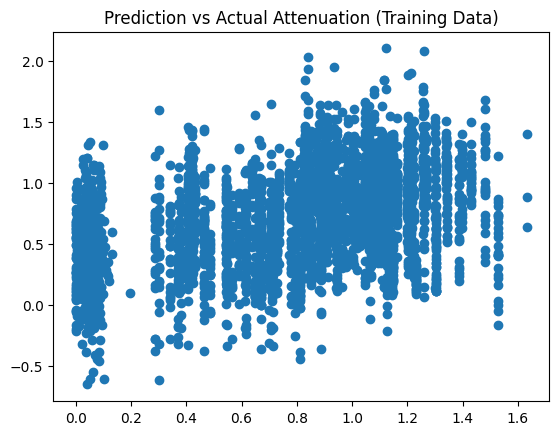

In [500]:
#test accuracy of the model in predicting real attenuation values.
pred = model.predict(train_dataset)
test_labels = np.concatenate([y for x, y in train_dataset], axis=0) #print(pred)
plt.scatter(test_labels, pred)
plt.title("Prediction vs Actual Attenuation (Training Data)")

Text(0.5, 1.0, 'Prediction vs Actual Attenuation (Testing Data)')

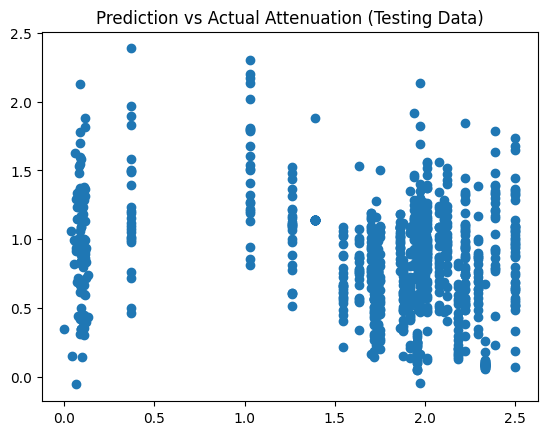

In [501]:
#test accuracy of the model in predicting real attenuation values.
pred = model.predict(test_dataset)
test_labels = np.concatenate([y for x, y in test_dataset], axis=0) #print(pred)
plt.scatter(test_labels, pred)
plt.title("Prediction vs Actual Attenuation (Testing Data)")